<a href="https://colab.research.google.com/github/antonionipo/Iniciando-Analise-de-Dados/blob/main/LojaVarejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uma loja de Varejo deseja criar algumas métricas para acompanhar seus resultados. possuem a base de vendas e base de clientes.
Sua missão é fazer todo o tratamento e união das bases para construção dessas métricas:
- Departamentos mais vendidos
- Média de preço com frete por Nome de Departamento
- Quantidade de vendas por Mês
- Média de renda para cada tipo de canal de venda
- Média de idade de clientes por bandeira

Premissas de negócio:
- Temos um erro de sistema, para compras sem UF, considere o Estado do MS
- Preço não pode ser maior que preço com frete

In [12]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [14]:
vendas = pd.read_excel('varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [15]:
clientes = pd.read_excel('cliente_varejo.xlsx')
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [16]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [17]:
def group_analysis(a, b):
  return a.groupby(b).idcompra.nunique()

group_analysis(vendas, 'idcanalvenda')

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


In [18]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [19]:
group_analysis(vendas, 'bandeira')

,idcompra
bandeira,
A,27679
B,38483


In [20]:
group_analysis(vendas, 'Nome_Departamento')

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [21]:
group_analysis(vendas, 'estado')

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


In [22]:
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ', '_')
group_analysis(vendas, 'Nome_Departamento')

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [23]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [24]:
# vendas_sem_nulos = vendas.dropna()
# vendas_sem_nulos.info()

In [25]:
vendas['estado'].fillna('MS', inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-25-72016c9833d3>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [26]:
vendas['Preço'].fillna(vendas['Preço'].mean(), inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-26-aa63f9791142>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [27]:
vendas_errado = vendas.query('Preço < Preço_com_frete')
vendas_certo = vendas.query('Preço >= Preço_com_frete')

In [28]:
vendas_certo.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,58181.000000,58181,58181.000000,58181.000000,58181.000000
mean,249941.585827,2023-03-02 01:58:06.519654144,1041.896846,1037.946535,13965.458260
min,0.000000,2023-01-02 00:00:00,6.320000,6.320000,1.000000
25%,126500.000000,2023-02-01 00:00:00,239.920000,239.200000,6958.000000
50%,249585.000000,2023-03-02 00:00:00,751.640000,719.280000,13978.000000
75%,374345.000000,2023-04-01 00:00:00,1319.200000,1319.200000,20963.000000
max,723410.000000,2023-04-30 00:00:00,14439.240000,14439.240000,27982.000000
std,144061.780364,NaN,1097.447105,1094.964499,8071.172662


In [29]:
vendas_certo.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Telefones_e_Celulares,14071
1,Eletroportateis,7544
2,Eletrodomesticos,6587
3,TVs_e_Acessorios,5176
4,Informatica,5015
5,Beleza_e_Saude,3601
6,Utilidades_Domesticas,2387
7,Acessorios_e_Inovacoes,2336
8,Moveis,2192
9,Tablets,1707


In [30]:
round(vendas_certo.groupby('Nome_Departamento').Preço.mean().sort_values(ascending=False).reset_index(), 2)

,Nome_Departamento,Preço
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2019.01
2,Informatica,2015.66
3,Linha_Industrial,1626.79
4,Telefones_e_Celulares,1419.64
5,Eletrodomesticos,1133.18
6,Tablets,958.11
7,Moveis,792.07
8,Acessorios_e_Inovacoes,790.17
9,Games,668.56


In [31]:
vendas_certo.sort_values('Data', ascending=False).groupby('Data').idcompra.nunique().reset_index()

,Data,idcompra
0,2023-01-02,476
1,2023-01-03,445
2,2023-01-04,492
3,2023-01-05,468
4,2023-01-06,479
...,...,...
114,2023-04-26,504
115,2023-04-27,505
116,2023-04-28,462
117,2023-04-29,499


In [32]:
vendas_certo['mes'] = vendas_certo['Data'].dt.month
vendas_certo.groupby('mes').idcompra.nunique().reset_index()

,mes,idcompra
0,1,13588
1,2,12901
2,3,14218
3,4,13686


In [33]:
clientes[['idade', 'renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [34]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [35]:
clientes = clientes.astype({'renda': 'float'})
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [36]:
vendas_clientes = vendas_certo.merge(clientes, on='cliente_Log', how='left')
vendas_clientes.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042,3,89,11337.0
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,39,4671.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,53,11717.0
4,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742,3,34,6047.0


In [37]:
# Calcula a média de renda para cada tipo de canal de venda
agg_idcanal_renda = round(vendas_clientes.groupby('idcanalvenda')['renda'].mean().reset_index(), 2)

# Exibe a tabela
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8239.36
1,Internet,8245.72
2,Mobile,8240.41


In [38]:
# Calcula a média de renda para cada tipo de canal de venda
agg_idade_bandeira = round(vendas_clientes.groupby('bandeira')['idade'].mean().reset_index(), 2)

# Exibe a tabela
agg_idade_bandeira

,bandeira,idade
0,A,53.55
1,B,53.42


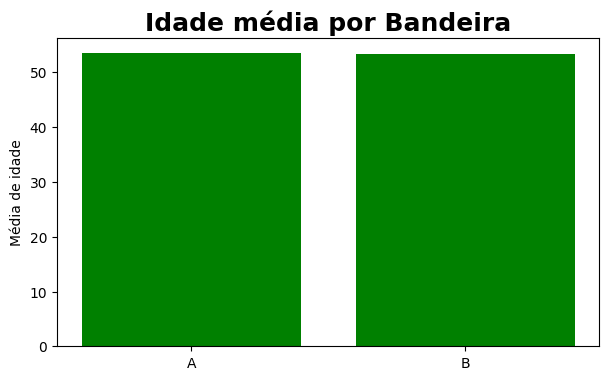

In [39]:
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")

plt.ylabel("Média de idade")

plt.title("Idade média por Bandeira", loc="center", fontsize=18, fontweight="bold", color= "black");

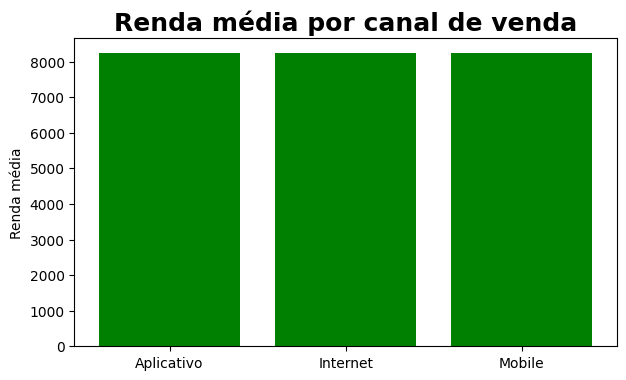

In [40]:
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")

plt.ylabel("Renda média")

plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");

In [41]:
vendas_por_data = vendas_certo.sort_values('Data', ascending=False).groupby('Data').idcompra.nunique().reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,476
1,2023-01-03,445
2,2023-01-04,492
3,2023-01-05,468
4,2023-01-06,479
...,...,...
114,2023-04-26,504
115,2023-04-27,505
116,2023-04-28,462
117,2023-04-29,499


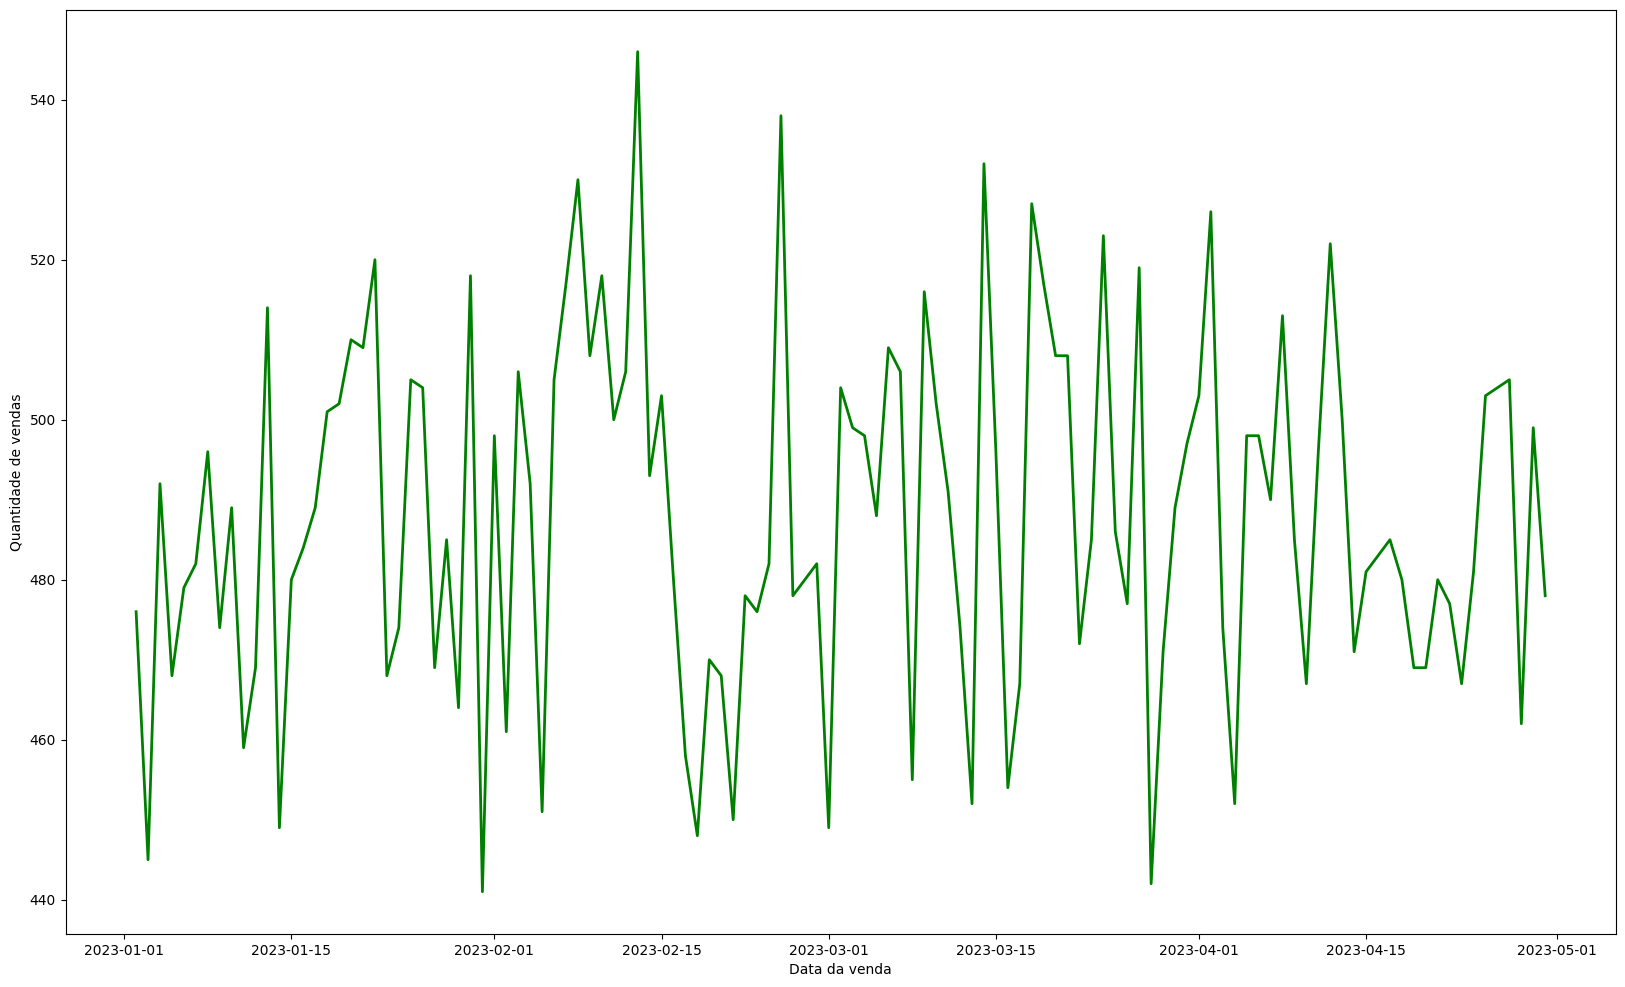

In [42]:
fig = plt.figure(figsize=(20,12))


plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = vendas_por_data["Data"]
y = vendas_por_data["idcompra"]

plt.plot(x,y, color = "green", linewidth = "2")
plt.show()

In [43]:
agg_dept_preco = round(vendas_certo.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2016.63
2,Informatica,2009.83
3,Linha_Industrial,1626.79
4,Telefones_e_Celulares,1418.13
5,Eletrodomesticos,1128.63
6,Tablets,956.31
7,Moveis,787.89
8,Acessorios_e_Inovacoes,785.81
9,Games,667.18


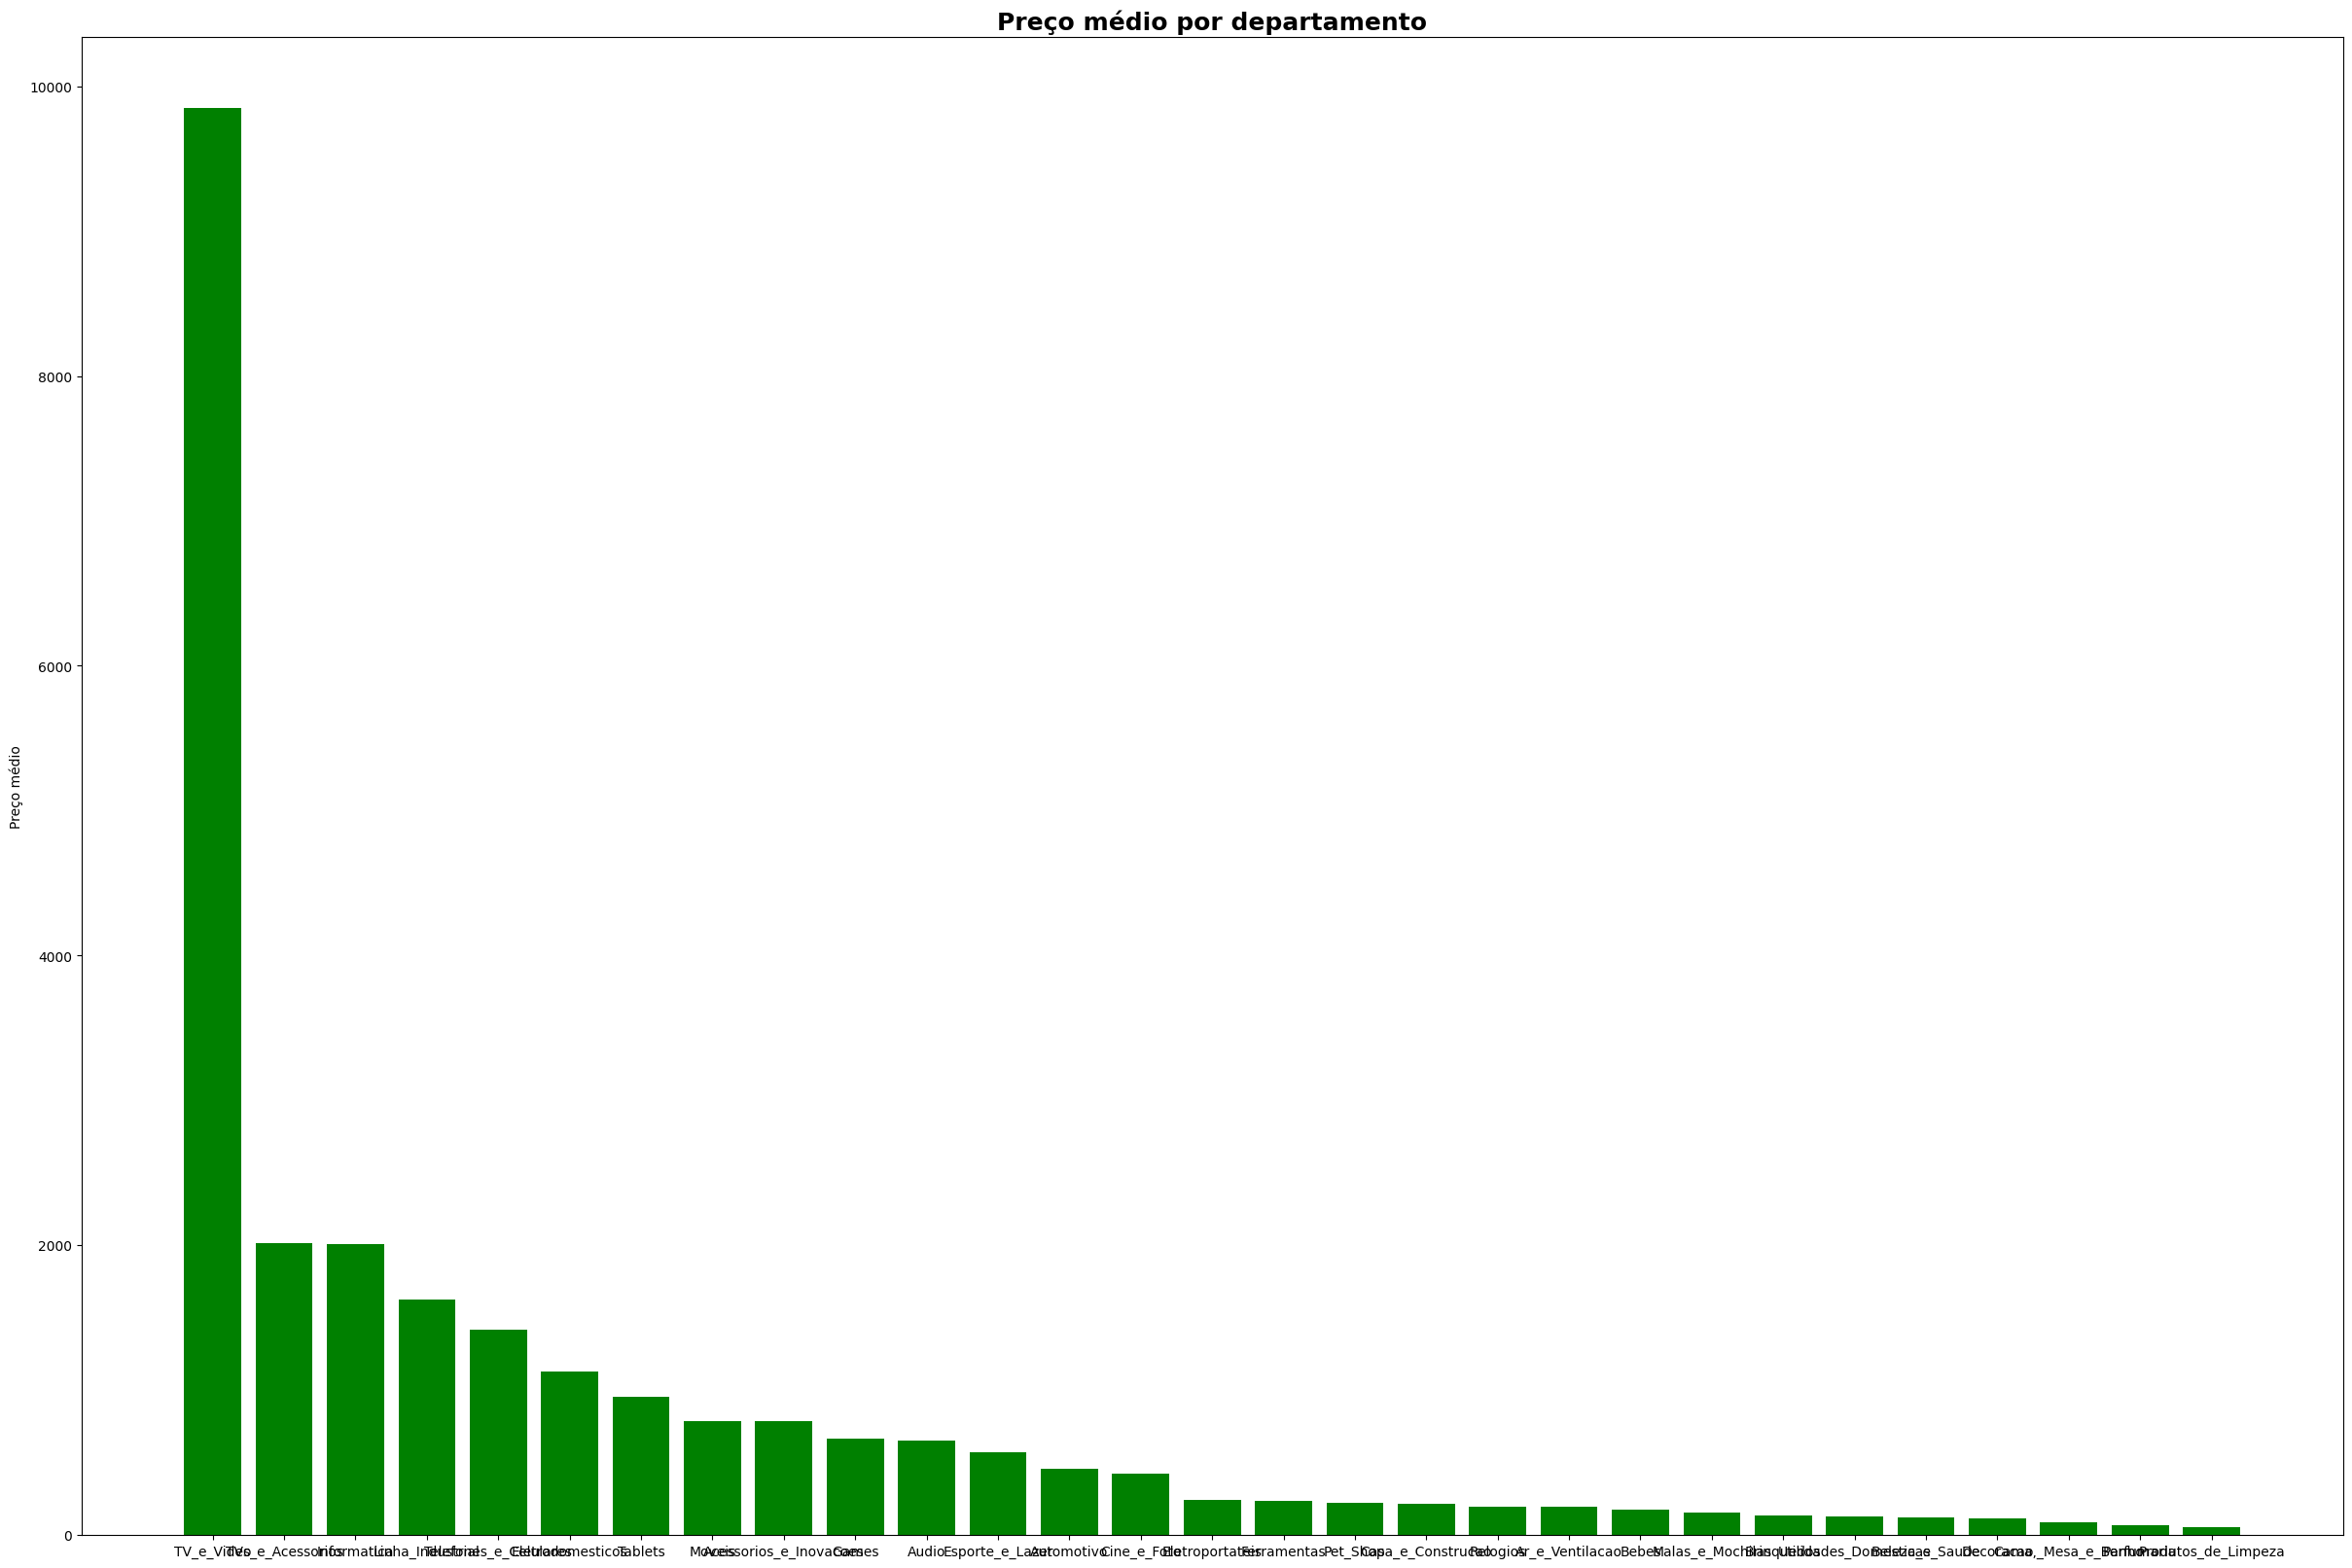

In [44]:
fig = plt.figure(figsize=(30,20))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")

plt.ylabel("Preço médio")

plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

In [45]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [47]:
px.line(vendas_por_data, x= "Data", y="idcompra")

In [48]:
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2016.63
2,Informatica,2009.83
3,Linha_Industrial,1626.79
4,Telefones_e_Celulares,1418.13
5,Eletrodomesticos,1128.63
6,Tablets,956.31
7,Moveis,787.89
8,Acessorios_e_Inovacoes,785.81
9,Games,667.18
